## Data Set Information:

* The dataset was downloaded from the UCI Machine Learning Repository.

* The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

* These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

* Two datasets were combined and few values were randomly removed.

### Attribute Information:

* For more information, read [Cortez et al., 2009]. 
    - Input variables (based on physicochemical tests): 
       - 1 - fixed acidity 
       - 2 - volatile acidity 
       - 3 - citric acid 
       - 4 - residual sugar 
       - 5 - chlorides 
       - 6 - free sulfur dioxide 
       - 7 - total sulfur dioxide 
       - 8 - density 
       - 9 - pH 
       - 10 - sulphates 
       - 11 - alcohol Output variable (based on sensory data): 
       - 12 - quality (score between 0 and 10)
        
### It's a classification problem i will try to 'Predict Wine Type'        

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [2]:
# Load the dataset
df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [4]:
df.shape

(6497, 13)

In [5]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

# Drop missing values


In [6]:
df.dropna(inplace=True)

In [7]:
# Display a description of the dataset

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


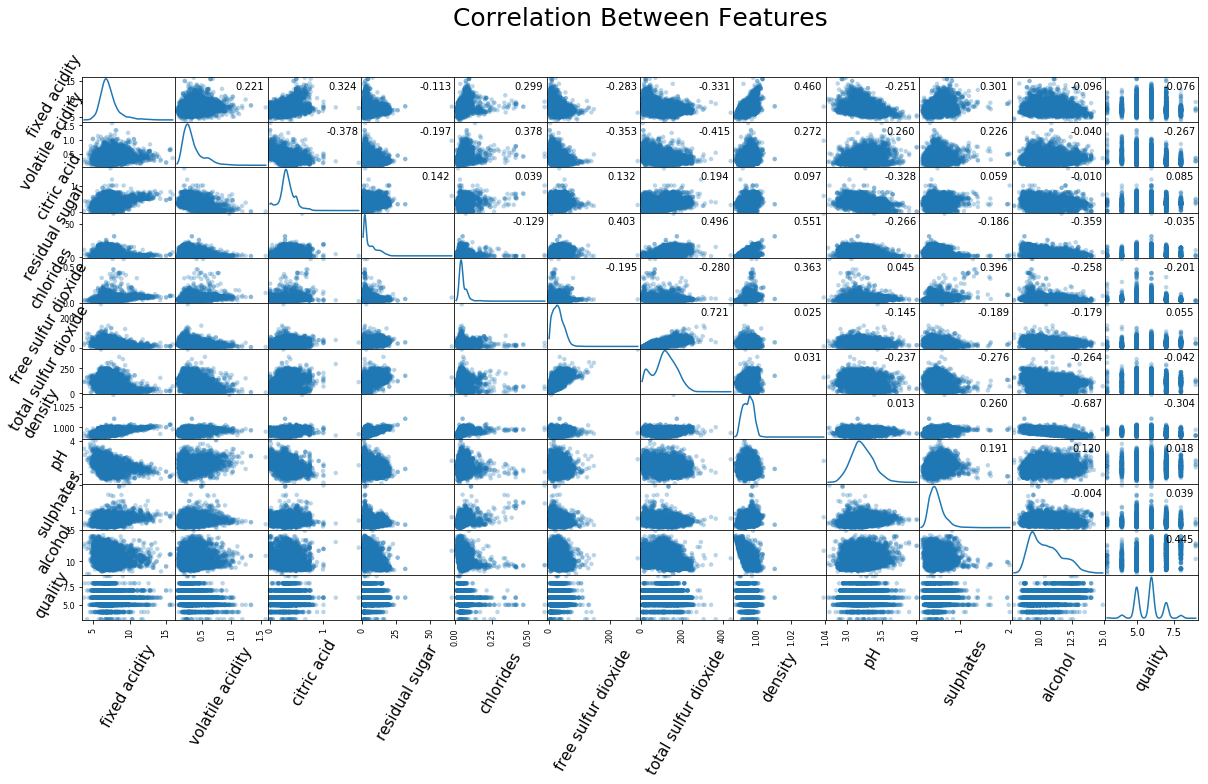

In [9]:
axes = pd.scatter_matrix(df, alpha = 0.3, figsize = (20,10), diagonal = 'kde' ,s=80)
corr = df.corr().as_matrix()
plt.title('Correlation Between Features',x=-5,y=13,fontsize=25)
# to change fontsize 
plt.xticks(fontsize =10,rotation =0)
plt.yticks(fontsize =10)
for ax in axes.ravel():
    ax.set_xlabel(ax.get_xlabel(),fontsize = 15, rotation = 60)
    ax.set_ylabel(ax.get_ylabel(),fontsize = 15, rotation = 60)
# put the correlation between each pair of variables on each graph
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i, j], (0.8, 0.8), xycoords="axes fraction", ha="center", va="center")
        

In [10]:
corr=df.corr()

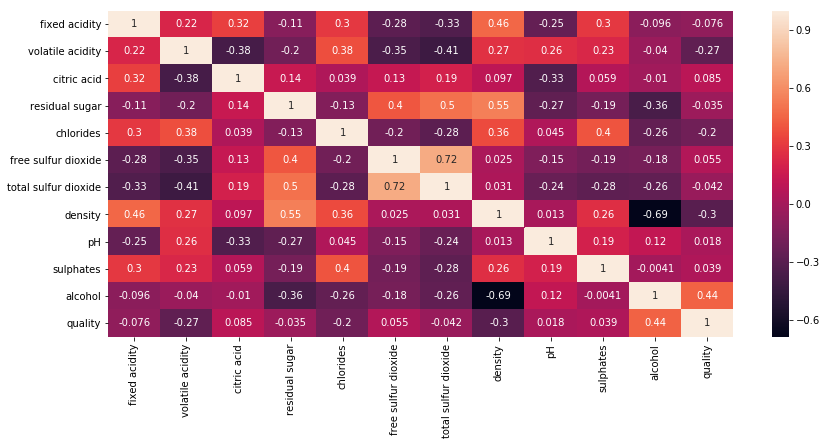

In [11]:
plt.figure(figsize=(14,6))
sns.heatmap(corr,annot=True)

# LabelEncoder

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [13]:
le.classes_

array(['red', 'white'], dtype=object)

In [14]:
le.transform(le.classes_)

array([0, 1], dtype=int64)

In [15]:
dict(zip(le.classes_, le.transform(le.classes_)))

{'red': 0, 'white': 1}

In [16]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
type                    6463 non-null int64
fixed acidity           6463 non-null float64
volatile acidity        6463 non-null float64
citric acid             6463 non-null float64
residual sugar          6463 non-null float64
chlorides               6463 non-null float64
free sulfur dioxide     6463 non-null float64
total sulfur dioxide    6463 non-null float64
density                 6463 non-null float64
pH                      6463 non-null float64
sulphates               6463 non-null float64
alcohol                 6463 non-null float64
quality                 6463 non-null int64
dtypes: float64(11), int64(2)
memory usage: 706.9 KB


In [18]:
df['type'].value_counts()

1    4870
0    1593
Name: type, dtype: int64

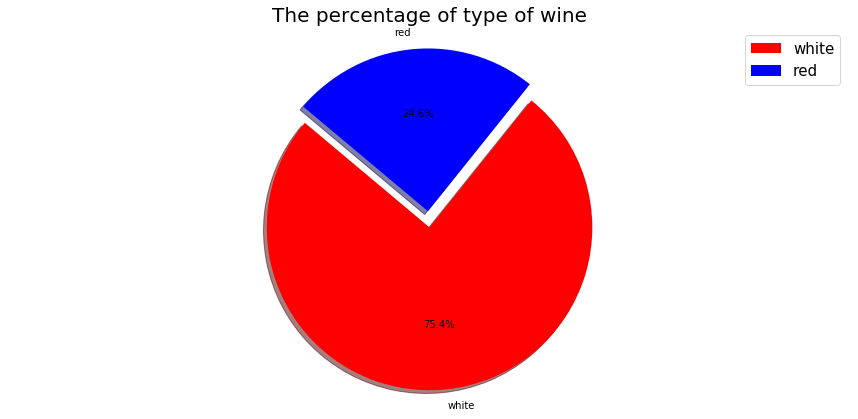

In [19]:
# {'red': 0, 'white': 1}



plt.figure(figsize=(15,7))
 
# Data to plot
labels = 'white', 'red'
sizes = [4870,1593]
colors = ['red', 'blue']
explode = (0.1, 0 )  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('The percentage of type of wine',fontsize=20)
plt.legend(('white', 'red'),fontsize=15)
plt.axis('equal')
plt.show()

* white wine more than red wine

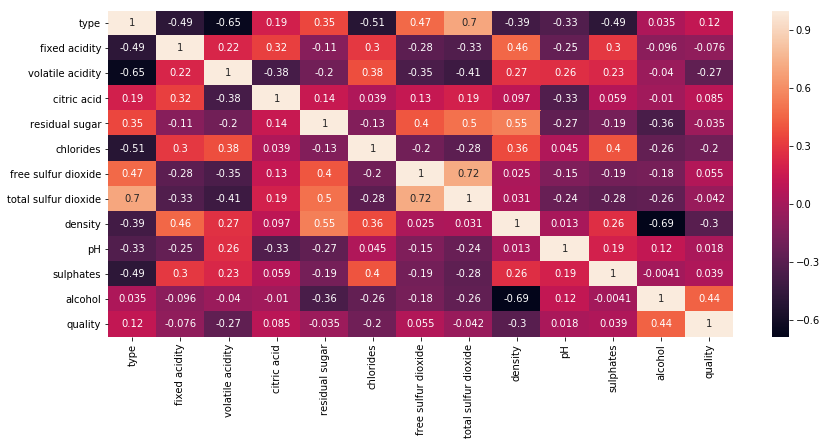

In [20]:
corr=df.corr()
plt.figure(figsize=(14,6))
sns.heatmap(corr,annot=True)

### To plot the normal distribution to know your column has outliers or not
* **free sulfur dioxide** are normal distributed because mean = 30.5 equals mode

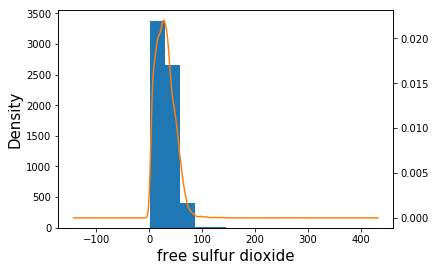

In [21]:
plt.xlabel('free sulfur dioxide',fontsize=15)
plt.ylabel('Frq',fontsize=15)
ax = df['free sulfur dioxide'].plot('hist')
df['free sulfur dioxide'].plot(kind='kde', ax=ax, secondary_y=True)
plt.show()

In [22]:
df['free sulfur dioxide'].mean()

30.516865232863996

### To plot the normal distribution to know your column has outliers or not
* **total sulfur dioxide** are 'bimodal asymmetrical' because mean = 115.7 equals mode

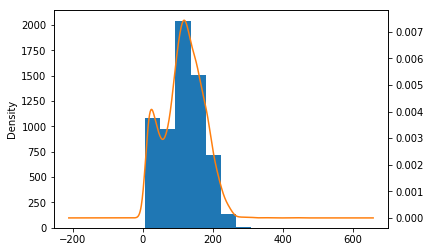

In [23]:
ax = df['total sulfur dioxide'].plot('hist')
df['total sulfur dioxide'].plot(kind='kde', ax=ax, secondary_y=True)

In [24]:
df['total sulfur dioxide'].mean()

115.69449172211047

# split data

In [27]:
# i choose 'total sulfur dioxide' because it has 0.7 corrolation with type 
# and 'free sulfur dioxide' because it has 0.47 corrolation with type
X = df[['free sulfur dioxide', 'total sulfur dioxide']]
y = df['type']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [30]:
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
log_reg = LogisticRegression()

In [33]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
y_pred = log_reg.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9306141584622597

In [36]:
print('Accuracy = ',round(accuracy_score(y_test,y_pred),4) *100, '%')

Accuracy =  93.06 %


In [37]:
# Making the Confusion Matrix will contain the correct and incorrect prediction on the dataset.
from sklearn.metrics import confusion_matrix

cm_log_reg = confusion_matrix(y_test, y_pred)
print(cm_log_reg)

[[ 429  100]
 [  48 1556]]


In [38]:
X_train

array([[ 0.0276131 ,  0.10200165],
       [-1.03642909, -0.46522682],
       [-0.98042687, -0.28796793],
       ...,
       [-0.08439134, -1.08563296],
       [-0.86842243, -1.47560253],
       [-1.20443575,  0.08427576]])

# Visualising the Training set results for Logistic Regression

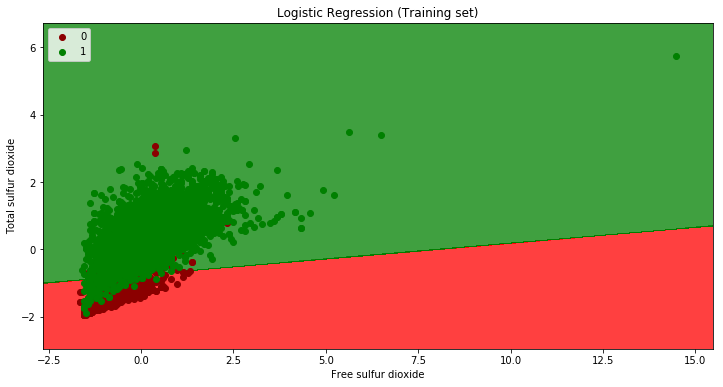

In [39]:

from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, log_reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))


plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'green'))(i), label = j)

plt.title('Logistic Regression (Training set)')

plt.xlabel('Free sulfur dioxide')

plt.ylabel('Total sulfur dioxide')

plt.legend()

plt.show()

In [40]:
X_set.shape

(4330, 2)

# Visualising the Test set results for Logistic Regression

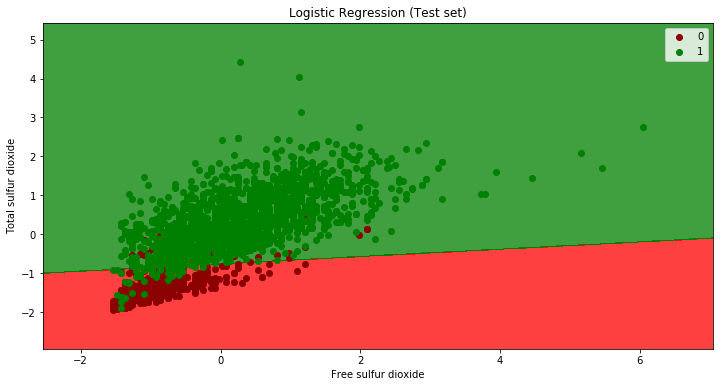

In [41]:


from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, log_reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('darkred', 'green'))(i), label = j)


plt.title('Logistic Regression (Test set)')

plt.xlabel('Free sulfur dioxide')

plt.ylabel('Total sulfur dioxide')


plt.legend()

plt.show()

In [42]:
X_set.shape

(2133, 2)

# KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier(n_neighbors=5)

In [45]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
knn_pred=knn.predict(X_test)


In [47]:
print('Accuracy = ',round(accuracy_score(y_test,knn_pred),4) *100, '%')

Accuracy =  91.7 %


In [48]:
import sklearn.metrics as metrics
score=[]
for k in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(X_train,y_train)
    predKNN=knn.predict(X_test)
    accuracy=metrics.accuracy_score(predKNN,y_test)
    score.append(accuracy*100)
    print ('k = ',k,'-> accuracy : ',accuracy)

k =  1 -> accuracy :  0.9090482887951242
k =  2 -> accuracy :  0.8823253633380216
k =  3 -> accuracy :  0.913736521331458
k =  4 -> accuracy :  0.9081106422878574
k =  5 -> accuracy :  0.9170182841068917
k =  6 -> accuracy :  0.9212376933895922
k =  7 -> accuracy :  0.9254571026722925
k =  8 -> accuracy :  0.9217065166432254
k =  9 -> accuracy :  0.929676511954993
k =  10 -> accuracy :  0.9226441631504922
k =  11 -> accuracy :  0.9310829817158931
k =  12 -> accuracy :  0.9259259259259259
k =  13 -> accuracy :  0.9306141584622597
k =  14 -> accuracy :  0.929676511954993
k =  15 -> accuracy :  0.9306141584622597
k =  16 -> accuracy :  0.9292076887013596
k =  17 -> accuracy :  0.9301453352086263
k =  18 -> accuracy :  0.9292076887013596
k =  19 -> accuracy :  0.9324894514767933
k =  20 -> accuracy :  0.9278012189404594
k =  21 -> accuracy :  0.9292076887013596
k =  22 -> accuracy :  0.9287388654477262
k =  23 -> accuracy :  0.9329582747304266
k =  24 -> accuracy :  0.9306141584622597
k = 

In [49]:
print(score.index(max(score))+1,' : ',round(max(score),2),'%')


62  :  93.48 %


In [50]:
knn = KNeighborsClassifier(n_neighbors=62)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)

In [51]:
print('Accuracy = ',round(accuracy_score(y_test,knn_pred),3) *100, '%')

Accuracy =  93.5 %


In [52]:
# Making the Confusion Matrix will contain the correct and incorrect prediction on the dataset.
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test, knn_pred)
print(cm_knn)

[[ 418  111]
 [  28 1576]]


* Miss classified from confusion_matrix = 139

# Visualising the Training set results for KNN

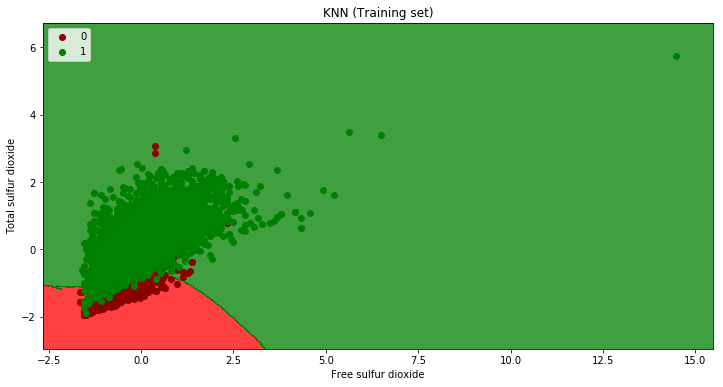

In [53]:

from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))


plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'green'))(i), label = j)

plt.title('KNN (Training set)')

plt.xlabel('Free sulfur dioxide')

plt.ylabel('Total sulfur dioxide')

plt.legend()

plt.show()

In [54]:
X_set.shape

(4330, 2)

# Visualising the Test set results for KNN

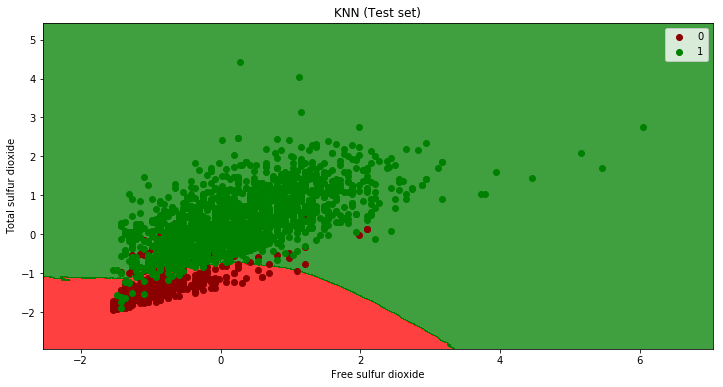

In [55]:


from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('darkred', 'green'))(i), label = j)


plt.title('KNN (Test set)')

plt.xlabel('Free sulfur dioxide')

plt.ylabel('Total sulfur dioxide')

plt.legend()

plt.show()

In [56]:
X_set.shape

(2133, 2)

In [57]:
train_accuracy=np.empty(len(range(1,100)))
test_accuracy=np.empty(len(range(1,100)))
for i, k in enumerate(range(1,100)):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(k)
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)
     #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

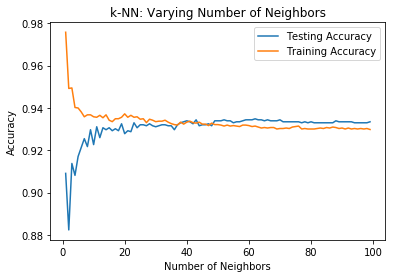

In [58]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(range(1,100), test_accuracy, label = 'Testing Accuracy')
plt.plot(range(1,100), train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# SVM

In [59]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear').fit(X_train,y_train)
svm_pred=svm_linear.predict(X_test)
print('Accuracy = ',round(accuracy_score(y_test,svm_pred),4) *100, '%')

Accuracy =  93.62 %


In [60]:
# Making the Confusion Matrix will contain the correct and incorrect prediction on the dataset.
cm_svm_lin = confusion_matrix(y_test, svm_pred)
print(cm_svm_lin)

[[ 426  103]
 [  33 1571]]


* Miss classified from confusion_matrix = 136

In [61]:
svm_poly=SVC(kernel='poly').fit(X_train,y_train)
svm_polr_pred=svm_poly.predict(X_test)
print('Accuracy = ',round(accuracy_score(y_test,svm_polr_pred),4) *100, '%')

Accuracy =  93.39 %


In [62]:
# Making the Confusion Matrix will contain the correct and incorrect prediction on the dataset.
cm_svm_polr = confusion_matrix(y_test, svm_polr_pred)
print(cm_svm_polr)

[[ 402  127]
 [  14 1590]]


* Miss classified from confusion_matrix = 141

In [63]:
svm_rbf=SVC(kernel='rbf').fit(X_train,y_train)
svm_rbf_pred=svm_rbf.predict(X_test)

print('Accuracy = ',round(accuracy_score(y_test,svm_rbf_pred),4) *100, '%')

Accuracy =  93.58 %


In [64]:
# Making the Confusion Matrix will contain the correct and incorrect prediction on the dataset.
cm_svm_rbf = confusion_matrix(y_test, svm_rbf_pred)
print(cm_svm_rbf)

[[ 418  111]
 [  26 1578]]


* Miss classified from confusion_matrix = 137

# Visualising the Training set results for SVM_linear

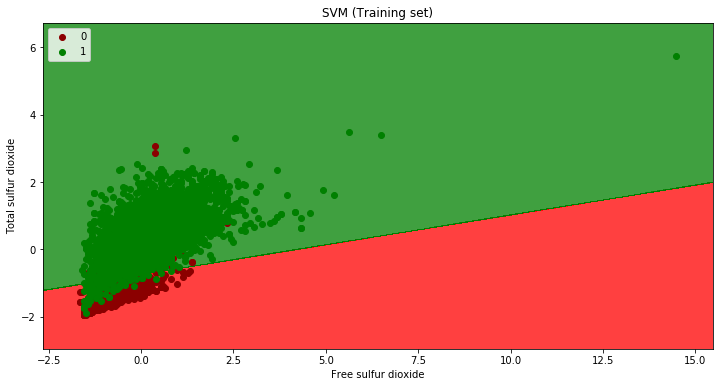

In [65]:

from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, svm_linear.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))


plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'green'))(i), label = j)

plt.title('SVM (Training set)')

plt.xlabel('Free sulfur dioxide')

plt.ylabel('Total sulfur dioxide')


plt.legend()

plt.show()

In [66]:
X_set.shape

(4330, 2)

# Visualising the Test set results for SVM_linear

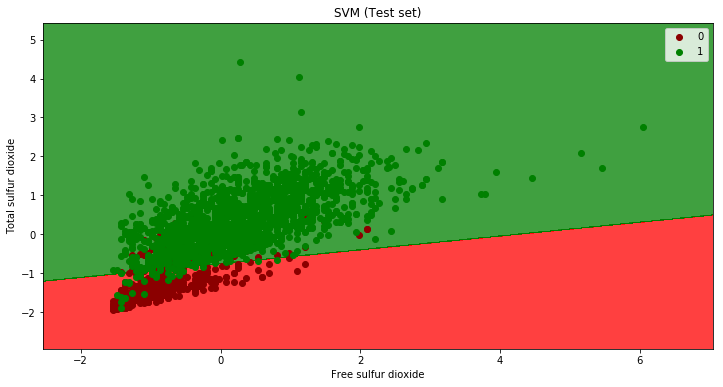

In [67]:


from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, svm_linear.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('darkred', 'green'))(i), label = j)


plt.title('SVM (Test set)')

plt.xlabel('Free sulfur dioxide')

plt.ylabel('Total sulfur dioxide')


plt.legend()

plt.show()

In [68]:
X_set.shape

(2133, 2)

# Visualising the Training set results for SVM_poly

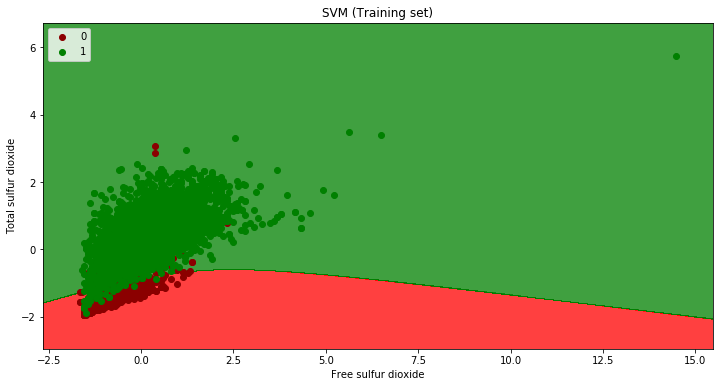

In [69]:

from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, svm_poly.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))


plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'green'))(i), label = j)

plt.title('SVM (Training set)')

plt.xlabel('Free sulfur dioxide')

plt.ylabel('Total sulfur dioxide')


plt.legend()

plt.show()

In [70]:
X_set.shape

(4330, 2)

# Visualising the Test set results for SVM_poly

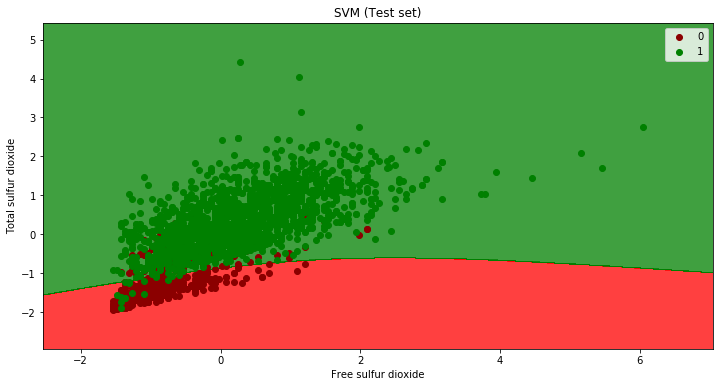

In [71]:


from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, svm_poly.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('darkred', 'green'))(i), label = j)


plt.title('SVM (Test set)')

plt.xlabel('Free sulfur dioxide')

plt.ylabel('Total sulfur dioxide')


plt.legend()

plt.show()

In [72]:
X_set.shape

(2133, 2)

# Visualising the Training set results for SVM_rbf

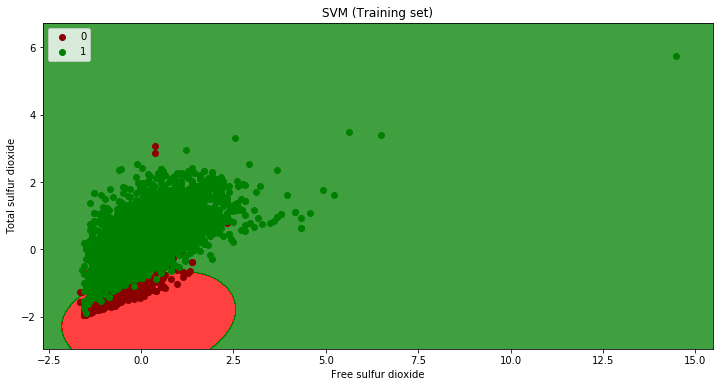

In [73]:

from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, svm_rbf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))


plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'green'))(i), label = j)

plt.title('SVM (Training set)')

plt.xlabel('Free sulfur dioxide')

plt.ylabel('Total sulfur dioxide')


plt.legend()

plt.show()

In [74]:
X_set.shape

(4330, 2)

# Visualising the Test set results for SVM_rbf

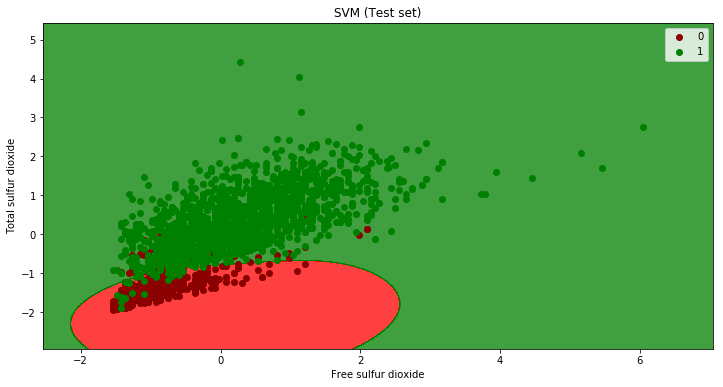

In [75]:


from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, svm_rbf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('darkred', 'green'))(i), label = j)


plt.title('SVM (Test set)')

plt.xlabel('Free sulfur dioxide')

plt.ylabel('Total sulfur dioxide')


plt.legend()

plt.show()

In [76]:
X_set.shape

(2133, 2)

# Naive bayes

In [77]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB().fit(X_train,y_train)
nb_pred=nb.predict(X_test)
print('Accuracy = ',round(accuracy_score(y_test,nb_pred),4) *100, '%')


Accuracy =  88.7 %


# Visualising the Training set results for Naive bayes

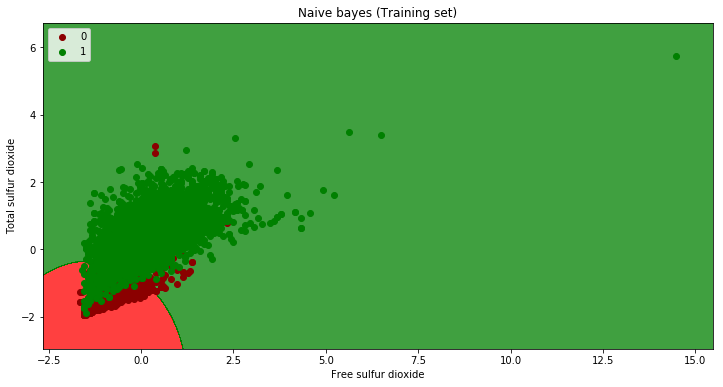

In [78]:

from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))


plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'green'))(i), label = j)

plt.title('Naive bayes (Training set)')

plt.xlabel('Free sulfur dioxide')

plt.ylabel('Total sulfur dioxide')


plt.legend()

plt.show()

In [79]:
X_set.shape

(4330, 2)

# Visualising the Test set results for Naive bayes

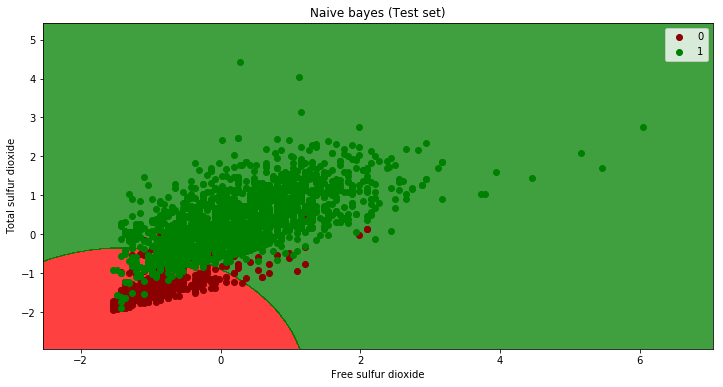

In [80]:


from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('darkred', 'green'))(i), label = j)


plt.title('Naive bayes (Test set)')

plt.xlabel('Free sulfur dioxide')

plt.ylabel('Total sulfur dioxide')


plt.legend()

plt.show()

In [81]:
X_set.shape

(2133, 2)

# The best accuracy 93.62% when i used svm_linear